![alt tag](https://codelearn.io/Upload/Blog/xu-ly-du-lieu-voi-pandas-trong-python-63725977973.8696.jpg)

# **What is Pandas**
Thư viện **Pandas** cung cấp các cấu trúc dữ liệu hiệu suất cao, dễ sử dụng và các công cụ phân tích dữ liệu. Cấu trúc dữ liệu chính là DataFrame, có thể coi đây là một bảng 2D trong bộ nhớ (giống như một bảng tính, với tên cột và nhãn). Nhiều tính năng có sẵn trong Excel có sẵn theo chương trình, chẳng hạn như tạo bảng tổng hợp, tính toán cột dựa trên các cột khác, vẽ biểu đồ, v.v. Có thể nhóm các hàng theo giá trị cột hoặc nối các bảng giống như trong SQL. **Pandas** cũng rất giỏi trong việc xử lý chuỗi thời gian. 🐼

# **Reference**
https://nbviewer.org/github/ageron/handson-ml2/blob/master/tools_pandas.ipynb

# **Pandas: Import**

Import thư viện **pandas**. Hầu hết mọi người sử dụng nó dưới dạng **pd**

In [1]:
import pandas as pd

# **Series Objects**
Thư viện **pandas** chứa các cấu trúc dữ liệu hữu ích sau:
* **Series Objects** là mảng 1D, tương tự như một cột trong bảng tính (với tên cột và hàng labels)
* **DataFrame Objects** là một bảng 2D, tương tự như một bảng tính (với tên cột và hàng labels)
* **Panel objects** như một từ điển của DataFrames

### **Creating a Series (Tạo 1 Series)**

In [2]:
s = pd.Series([100, 65, -2, -44, 8])
s

0    100
1     65
2     -2
3    -44
4      8
dtype: int64

### **Similar to a 1D ndarray (Tính chất tương tự như Mảng 1D)**

**Series objects** hoạt động giống như các **ndarrays** **NumPy** 1D và có thể thực hiện các phép toán trong thư viện Numpy

In [3]:
import numpy as np

In [4]:
np.sin(s)

0   -0.506366
1    0.826829
2   -0.909297
3   -0.017702
4    0.989358
dtype: float64

Áp dụng các phép toán số học như **ndarrays**

In [5]:
s + [101, 200, 300, 400, 500]

0    201
1    265
2    298
3    356
4    508
dtype: int64

**Broadcasting**

In [6]:
s - 100

0      0
1    -35
2   -102
3   -144
4    -92
dtype: int64

Các phép toán điều kiện

In [7]:
s < 0

0    False
1    False
2     True
3     True
4    False
dtype: bool

### **Index labels (Chỉ mục của nhãn)**

In [8]:
ss = pd.Series([16, 18, 19, 20, 17], index = ["Kiet", "Luu", "Toan", "Thang", "Phuc"])
ss

Kiet     16
Luu      18
Toan     19
Thang    20
Phuc     17
dtype: int64

Truy xuất theo tên chỉ mục hoặc truy xuất theo chỉ số thông thường

In [9]:
print(ss["Kiet"])
print(ss[0])

16
16


Để làm rõ khi đang truy cập theo nhãn hoặc theo vị trí số nguyên, khi truy xuất nên luôn sử dụng thuộc tính **loc** khi truy cập theo nhãn và sử dụng thuộc tính **iloc** khi truy cập theo vị trí số nguyên

In [10]:
ss.loc["Toan"]

19

In [11]:
ss.iloc[2]

19

Truy xuất trên đoạn

In [12]:
ss.iloc[1:4]

Luu      18
Toan     19
Thang    20
dtype: int64

### **Init from dict (Khởi tạo từ dòng Dict)**

In [13]:
w = {"Kiet": 10,"Luu": 8, "Toan": 2, "Thang": 4, "Phuc": 5}
ser = pd.Series(w)
ser

Kiet     10
Luu       8
Toan      2
Thang     4
Phuc      5
dtype: int64

Kiểm soát các phần tử muốn đưa vào Series và theo thứ tự nào bằng cách chỉ định rõ ràng chỉ mục mong muốn:

In [14]:
ser1 = pd.Series(ser, index=["Kiet", "Luu", "Thang"])
ser1

Kiet     10
Luu       8
Thang     4
dtype: int64

### **Automatic alignment (Căn chỉnh tự động)**

In [15]:
s1 = pd.Series([5, 10, 15, 20, 25], index=["Kiet", "Luu", "Toan", "Thang", "Phuc"])
d = {"Kiet": 2, "Luu": 4, "Thinh": 6, "Thang": 8, "Toan": 10}
s2 = pd.Series(d)
s3 = pd.Series([10, 100, 1000, 10000])

In [16]:
s1

Kiet      5
Luu      10
Toan     15
Thang    20
Phuc     25
dtype: int64

In [17]:
s2

Kiet      2
Luu       4
Thinh     6
Thang     8
Toan     10
dtype: int64

In [18]:
s3

0       10
1      100
2     1000
3    10000
dtype: int64

Khi một thao tác liên quan đến nhiều **Series Objects**, **Pandas** sẽ tự động căn chỉnh các mục bằng cách khớp các nhãn chỉ mục.

In [19]:
s1 + s2

Kiet      7.0
Luu      14.0
Phuc      NaN
Thang    28.0
Thinh     NaN
Toan     25.0
dtype: float64

> Chuỗi kết quả chứa liên hợp các nhãn chỉ mục của **s1** và **s2**. Vì thiếu "Thinh" trong s1 và thiếu "Phuc" trong s2, các mục này có giá trị kết quả **NaN** (tức là. Not-a-Number)

In [20]:
s1 + s3

0       NaN
1       NaN
2       NaN
3       NaN
Kiet    NaN
Luu     NaN
Phuc    NaN
Thang   NaN
Toan    NaN
dtype: float64

> Khi quên đặt chỉ mục, kết quả sẽ là tổng hợp kết quả của cả 2 trường hợp và cho ra chuỗi toàn **NaN** như trên

### **Init with a scalar (Khởi tạo với một đại lượng vô hướng)**

In [21]:
sca = pd.Series(100, ["Thang", "Kiet", "Luu", "Toan", "Phuc"])
sca

Thang    100
Kiet     100
Luu      100
Toan     100
Phuc     100
dtype: int64

### **Series name (Đặt tên cho Series)**
Mỗi **Series** có thể có tên riêng của nó

In [22]:
ser2 = pd.Series([1,0,1,0], ["Computer Science", "Data Science", "Software Engineer", "Computer Engineer"], name="Specialize")
ser2

Computer Science     1
Data Science         0
Software Engineer    1
Computer Engineer    0
Name: Specialize, dtype: int64

### **Plotting a Series**
**Pandas** giúp dễ dàng vẽ dữ liệu **Series** bằng **matplotlib**

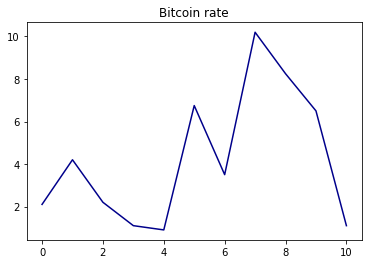

In [23]:
import matplotlib.pyplot as plt
bitcoin = [2.1, 4.2, 2.2, 1.1, 0.9, 6.75, 3.5, 10.2, 8.25, 6.5, 1.1]
bitcoin_series = pd.Series(bitcoin)
bitcoin_series.plot(color="darkblue")
plt.title("Bitcoin rate")
plt.show()

> Tham khảo thêm trong [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html)